## Importing Sagemaker

In [1]:
import boto3, os, sagemaker
from sagemaker import get_execution_role

iam_role = get_execution_role()

my_region = boto3.Session().region_name

sm_session = sagemaker.session.Session(boto3.Session())

print("Success")

Success


## Importing Various Packages and Data

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11.7,8.27)})

adult = pd.read_csv("s3://mgta495-project/adult.data", header=None, delimiter=r",\s+")
adult.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Use provided column names/definitions to add colnames 

In [3]:
cols = {
    "age": "continuous",
    "workclass": "Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked",
    "fnlwgt": "continuous",
    "education": "Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool",
    "education-num": "continuous",
    "marital-status": "Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse",
    "occupation": "Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces",
    "relationship": "Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried",
    "race": "White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black",
    "sex": "Female, Male",
    "capital-gain": "continuous",
    "capital-loss": "continuous",
    "hours-per-week": "continuous",
    "native-country": "United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands",
    "income": ">50K, <=50K",
}

with open('cols_dict.pickle', 'wb') as f:
    pickle.dump(cols, f, protocol=pickle.HIGHEST_PROTOCOL)

In [4]:
cols_dict = pickle.load(open('cols_dict.pickle', 'rb'))

In [5]:
adult.columns = [cols for cols in cols_dict.keys()]

In [6]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Characteristic Exploration

In [7]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

#### While it is ok for some columns to have object types, we want to convert numeric columns to int type 

In [8]:
dtypes = {
    "age": int,
    "workclass": str,
    "fnlwgt": int,
    "education": str,
    "education-num": int,
    "marital-status": str,
    "occupation": str,
    "relationship": str,
    "race": str,
    "sex": str,
    "capital-gain": int,
    "capital-loss": int,
    "hours-per-week": int,
    "native-country": str,
    "income": str
}

adult = adult.astype(dtypes)

In [9]:
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [10]:
adult.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [11]:
pd.DataFrame.from_dict(cols_dict, orient='index')

,0
age,continuous
workclass,"Private, Self-emp-not-inc, Self-emp-inc, Feder..."
fnlwgt,continuous
education,"Bachelors, Some-college, 11th, HS-grad, Prof-s..."
education-num,continuous
marital-status,"Married-civ-spouse, Divorced, Never-married, S..."
occupation,"Tech-support, Craft-repair, Other-service, Sal..."
relationship,"Wife, Own-child, Husband, Not-in-family, Other..."
race,"White, Asian-Pac-Islander, Amer-Indian-Eskimo,..."
sex,"Female, Male"


#### Print "?" Counts for all Columns

In [12]:
for x in range(len(list(adult.columns))):
    print("{} number of missing values in column {}".format(sum((adult.iloc[:,x]).astype('str').str.contains('\?')), 
          list(adult.columns)[x]))

0 number of missing values in column age
1836 number of missing values in column workclass
0 number of missing values in column fnlwgt
0 number of missing values in column education
0 number of missing values in column education-num
0 number of missing values in column marital-status
1843 number of missing values in column occupation
0 number of missing values in column relationship
0 number of missing values in column race
0 number of missing values in column sex
0 number of missing values in column capital-gain
0 number of missing values in column capital-loss
0 number of missing values in column hours-per-week
583 number of missing values in column native-country
0 number of missing values in column income


##### It seems that the missing values are mostly ? characters

#### Two options to deal with the missing values:
 - Delete
 - Impute mean
 - Use classification to predict the values
 
#### Will be explored later

## Data Visualization 

#### Histogram of income column

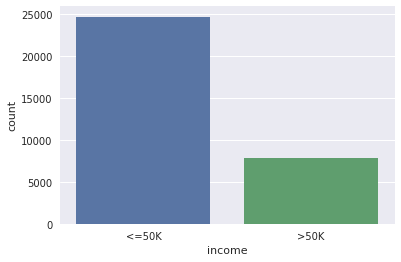

In [13]:
sns.countplot(adult['income'])
plt.show()

KeyboardInterrupt: 

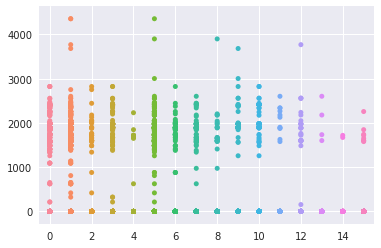

In [14]:
plot = sns.swarmplot(x=adult['education'], y=adult['capital-loss'])
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


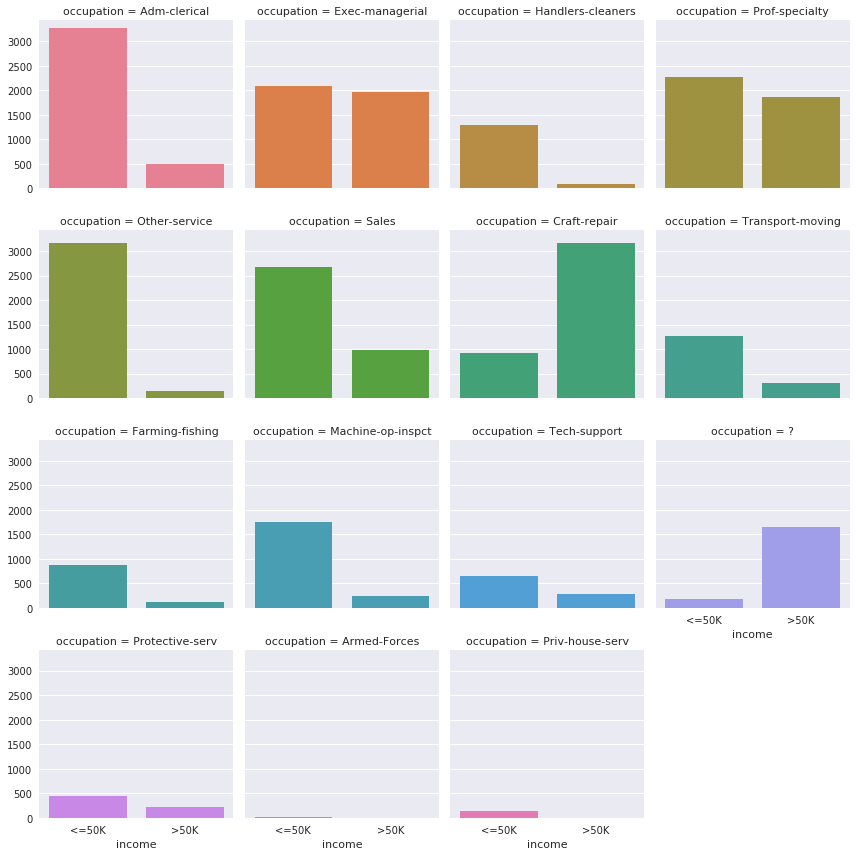

In [15]:
grid = sns.FacetGrid(adult, col='occupation', col_wrap=4, hue="occupation")
grid.map(sns.countplot, 'income')

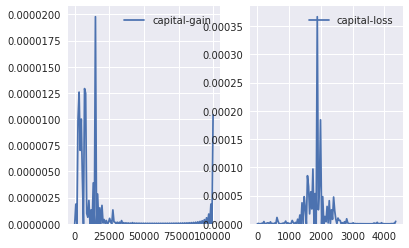

In [16]:
fig, axs = plt.subplots(ncols=2)
sns.kdeplot(adult['capital-gain'], ax=axs[0])
sns.kdeplot(adult['capital-loss'], ax=axs[1])
plt.show()

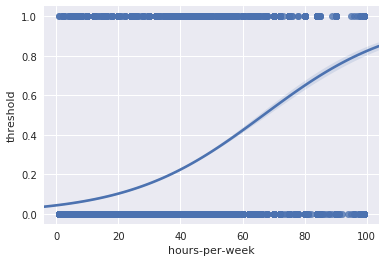

In [17]:
adult['threshold'] = np.where(adult['income'] == '>50K', True, False)
sns.regplot(x='hours-per-week', y='threshold', data=adult,
            logistic=True)

In [18]:
adult['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)